# Data Exploration and Analysis of Monteria Weather Data 

## Read csv files

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

years = ["2012", "2013", "2014", "2015"]
df_list = []

# Read in csv files
for year in years:
    temp_df = pd.read_csv("weather_mtr_{0}.csv".format(year)) # Read csv file
    temp_df = temp_df[["COT", "Precipitationmm"]] # Filter columns of interest
    temp_df.rename(columns={"COT":"date", "Precipitationmm": "precipitation"}, inplace=True) # Rename column indexes
    temp_df["date"] = pd.to_datetime(temp_df["date"]) # Set proper dtype on date column
    temp_df = temp_df[temp_df["precipitation"] < 200] # Filter out one strangely high precipitation value point
    df_list.append(temp_df) # Append to the dataframes list

# Built dataframe
df = pd.concat(df_list)
df.reset_index(inplace=True)
df.drop("index", axis=1, inplace=True)
df.head()

,date,precipitation
0,2012-01-01,0.0
1,2012-01-02,0.0
2,2012-01-03,0.0
3,2012-01-04,0.0
4,2012-01-05,0.0


## Scatter Plot 

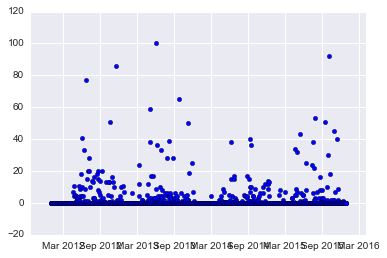

In [63]:
plt.scatter(df["date"].tolist(), df["precipitation"].tolist())
plt.show()

One can see four (4) main clusters. Since there are four (4) years of data in the compound dataframe once could assume that there are intervals between each year in wich rains are scarce.

## Yearly Scatter Plot

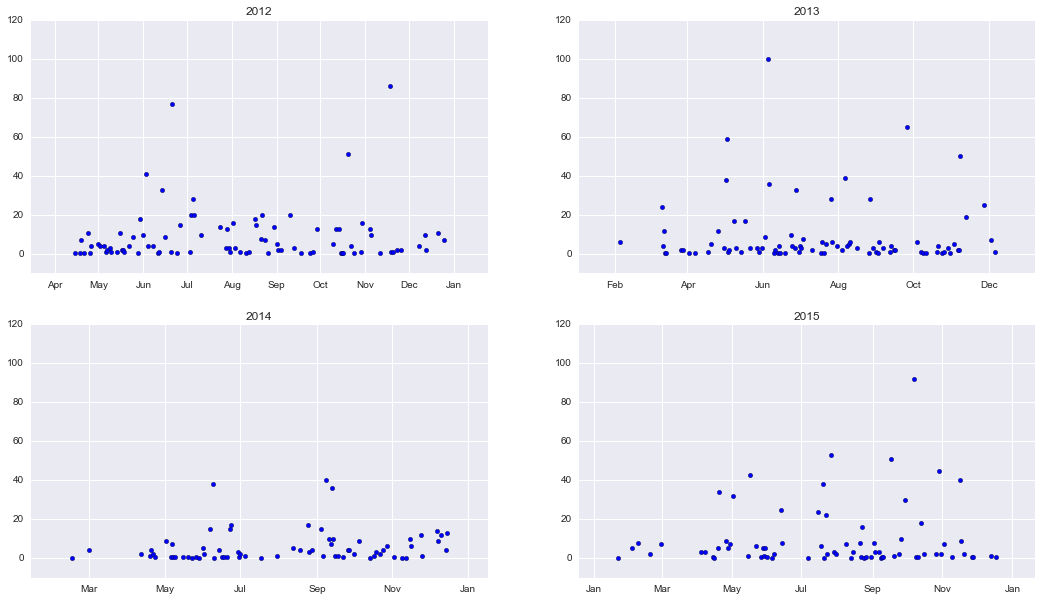

In [64]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(18,10))
axis_list = []
axis_list.append(fig.add_subplot(2,2,1))
axis_list.append(fig.add_subplot(2,2,2))
axis_list.append(fig.add_subplot(2,2,3))
axis_list.append(fig.add_subplot(2,2,4))

for index, year_df in enumerate(df_list):
    ax = axis_list[index]
    nonzero_year_df = year_df[year_df["precipitation"] > 0]
    ax.scatter(nonzero_year_df["date"].tolist(), nonzero_year_df["precipitation"].tolist())
    ax.set_title(years[index])
    ax.set_ylim(-10,120)
    hfmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_formatter(hfmt)
plt.show()

It is hard to identify a pattern to identify rainy months and dry months across all years. One could argue that there is a range of the year, from roughly half of April to November where there is rain. In opossition one also could argue that during a part of December and the first 3.5 months of the year there is almost no rain. Lets explore this assumption further.

## Number Of Rainy Days Per Year

In [65]:
for index, year_df in enumerate(df_list):
    print("The year {0} has {1} rainy days.".format(years[index], year_df.shape[0]))

The year 2012 has 366 rainy days.
The year 2013 has 364 rainy days.
The year 2014 has 357 rainy days.
The year 2015 has 363 rainy days.


## Precipitation Per Week

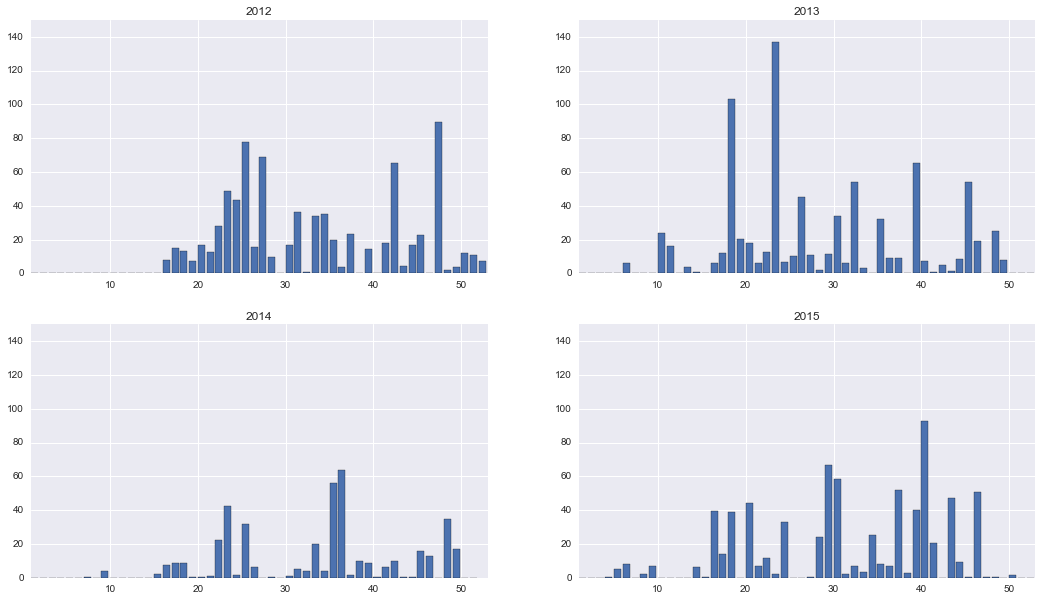

In [66]:
# Assign week of the year to each row 
for year_df in df_list:
    week_day = 1
    week = 1
    for index, row in year_df.iterrows():
        year_df.loc[index, "week"] = week
        if week_day%7 == 0:
            week_day = 0
            week += 1
        week_day +=1

# Get precipitation per week
weekly_precipitation_list = []
for year_df in df_list:
    weekly_precipitation_list.append(year_df.groupby("week").sum())
    
# Plot precipitation per week
fig_2 = plt.figure(figsize=(18,10))
axis_list_2 = []
axis_list_2.append(fig_2.add_subplot(2,2,1))
axis_list_2.append(fig_2.add_subplot(2,2,2))
axis_list_2.append(fig_2.add_subplot(2,2,3))
axis_list_2.append(fig_2.add_subplot(2,2,4))

for index, weekly_precipitation in enumerate(weekly_precipitation_list):
    ax = axis_list_2[index]
    #weekly_precipitation.plot(kind="bar", ax=ax)
    ax.bar(weekly_precipitation.index.values.tolist(), weekly_precipitation["precipitation"].tolist())
    ax.set_ylim(0,150)
    ax.set_xlim(1,53)
    ax.set_title(years[index])

plt.show()

The previous plots allow us to see the precipitation for each week of the year, for every year, on a glance it's hard to tell that there are "winter seasons" and "summer seasons". However it appears to be that up to around the 15th week of the year it is indeed very dry. 

## Rain or No Rain

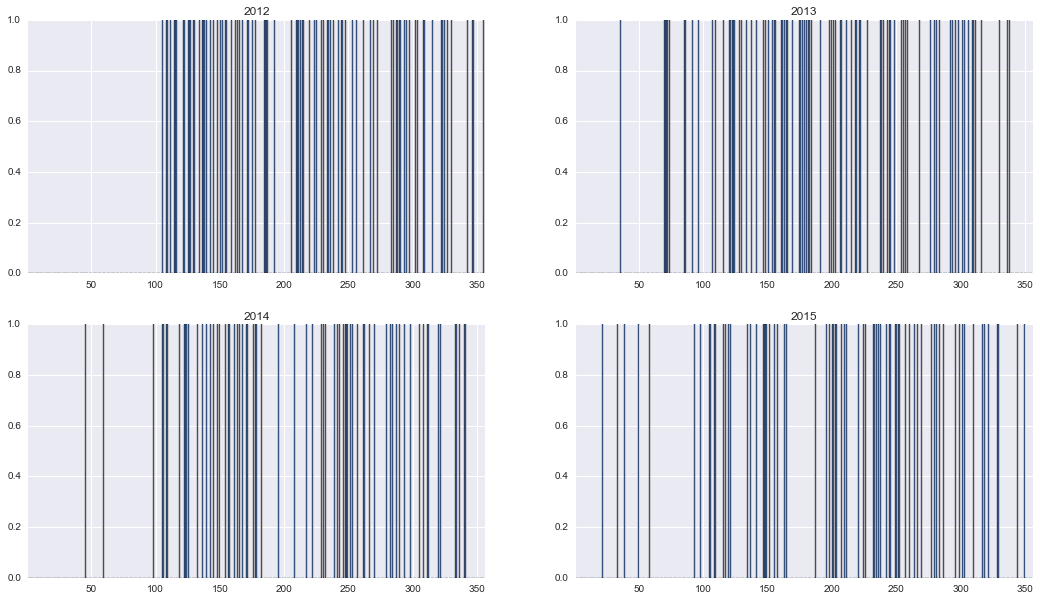

In [67]:
# Assign week of the year to each row 
for year_df in df_list:
    year_df["rained"] = (year_df["precipitation"] > 0).astype(int)

# Plot rained boolean value
fig_3 = plt.figure(figsize=(18,10))
axis_list_3 = []
axis_list_3.append(fig_3.add_subplot(2,2,1))
axis_list_3.append(fig_3.add_subplot(2,2,2))
axis_list_3.append(fig_3.add_subplot(2,2,3))
axis_list_3.append(fig_3.add_subplot(2,2,4))

for index, year_df in enumerate(df_list):
    ax = axis_list_3[index]
    #weekly_precipitation.plot(kind="bar", ax=ax)
    ax.bar(year_df.index.values.tolist(), year_df["rained"].tolist())
    #ax.set_ylim(1,356)
    ax.set_xlim(1,356)
    ax.set_title(years[index])

plt.show()

Further exploration allows us to corroborate that up to around the first 100 days of the year (i.e. the 15th week of the year) the number of rainy days are very scarce. Reason for which is not recommended to plant seeds on this first 100 days. 